Average price for location_1st Phase JP Nagar: 101.5909090909091
Average price for location_2nd Phase Judicial Layout: 46.18181818181818
Average price for location_5th Block Hbr Layout: 60.75
Average price for location_5th Phase JP Nagar: 61.94838709677419
Average price for location_6th Phase JP Nagar: 79.56428571428572
Average price for location_7th Phase JP Nagar: 80.22771653543307
Average price for location_8th Phase JP Nagar: 53.87715909090909
Average price for location_9th Phase JP Nagar: 56.93870967741936
Average price for location_AECS Layout: 61.964999999999996
Average price for location_Abbigere: 37.07444444444444
Average price for location_Akshaya Nagar: 75.11636363636363
Average price for location_Ambalipura: 82.90136363636363
Average price for location_Ambedkar Nagar: 118.1304347826087
Average price for location_Amruthahalli: 62.775
Average price for location_Anandapura: 54.58692307692308
Average price for location_Ananth Nagar: 32.73758620689655
Average price for location_

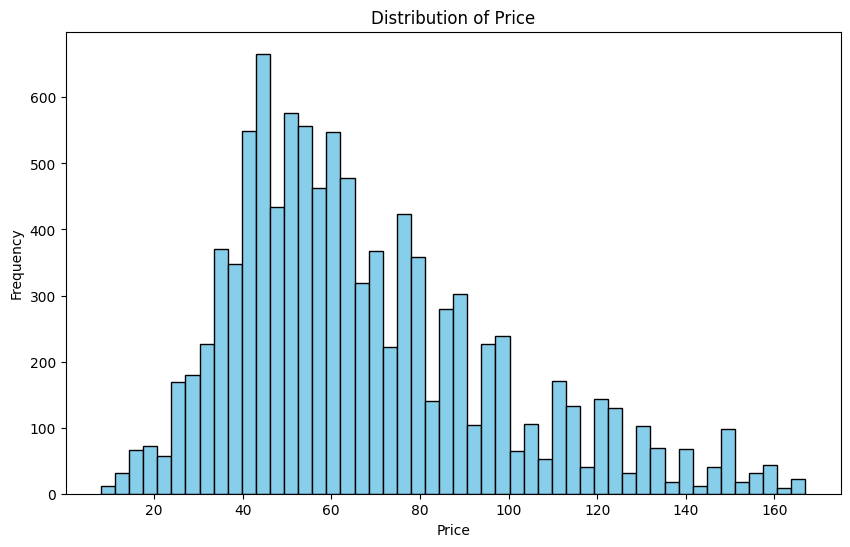

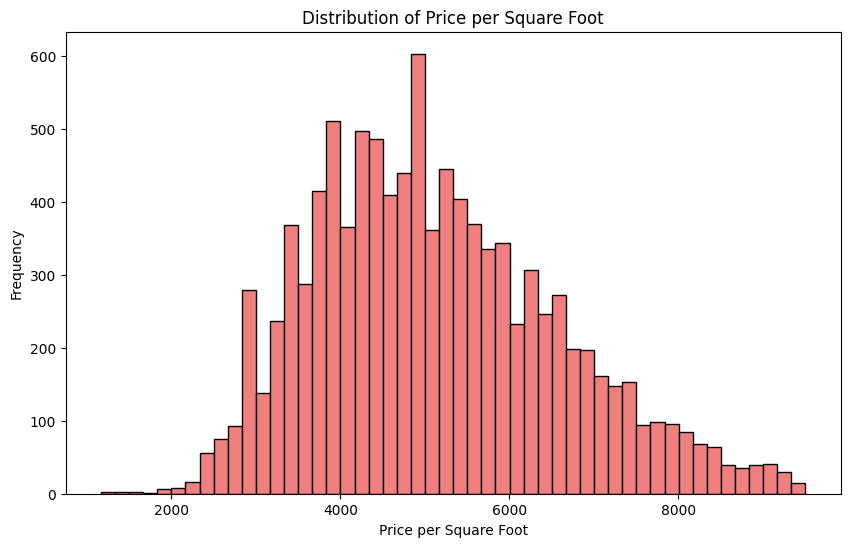

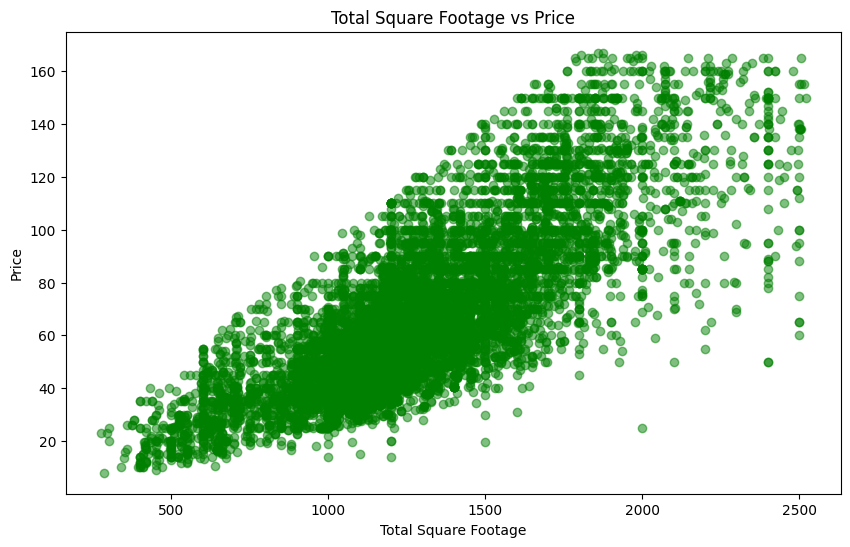

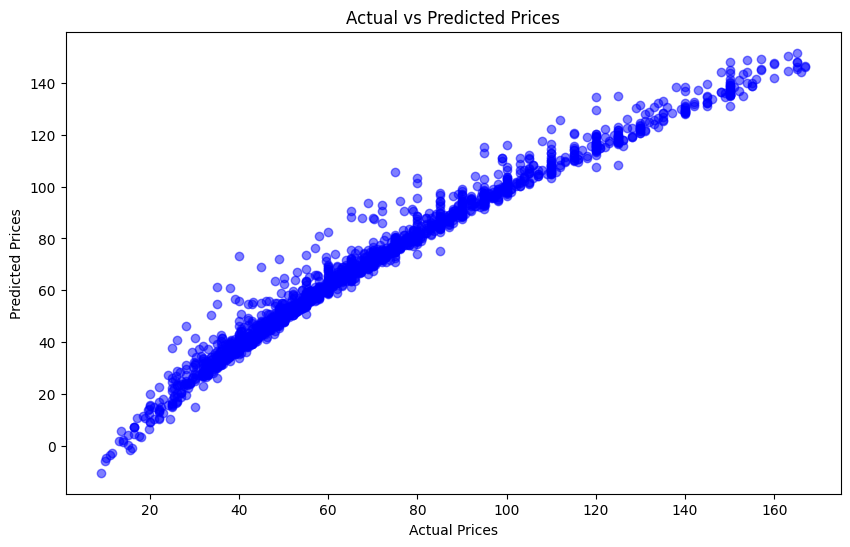

In [6]:

# Import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import seaborn as sns
import warnings

# Suppressing update warnings for cleaner output
warnings.filterwarnings('ignore')

# Step 1: Load the dataset
df = pd.read_csv("Bengaluru_House_Data.csv")

# Step 2: Drop irrelevant columns
df = df.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')

# Step 3: Drop rows with missing values
df = df.dropna()

# Step 4: Extract BHK from 'size' column
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

# Step 5: Convert non-numeric 'total_sqft' values
def convert_sqft_to_num(x):
    try:
        tokens = x.split('-')
        if len(tokens) == 2:
            return (float(tokens[0]) + float(tokens[1])) / 2  # Average of range
        return float(x)
    except (ValueError, TypeError):
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df = df.dropna(subset=['total_sqft'])  # Removing rows where 'total_sqft' is still non-numeric

# Step 6: Create 'price_per_sqft' column
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

# Step 7: Group rare locations under 'other'
df['location'] = df['location'].apply(lambda x: x.strip())  # Remove extra spaces
location_stats = df['location'].value_counts()
location_stats_less_than_10 = location_stats[location_stats <= 10]
df['location'] = df['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

# Step 8: Handle outliers using IQR for selected columns
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]  # Removing outliers
    return df

for col in ['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']:
    df = remove_outliers(df, col)

# Step 9: Handle categorical variables (Location) by encoding (One-Hot Encoding)
df = pd.get_dummies(df, columns=['location'], drop_first=True)

# Step 10: Aggregate data for summary statistics (e.g., average sale prices by one-hot encoded location)
# After pd.get_dummies, columns for each location will be created (e.g., location_Bangalore, location_Whitefield)
location_columns = [col for col in df.columns if col.startswith('location_')]  # Identifying one-hot encoded columns

# For each one-hot encoded location, calculate the average price
for loc in location_columns:
    avg_price = df[df[loc] == 1]['price'].mean()
    print(f"Average price for {loc}: {avg_price}")

# Step 11: Split features and target variable
X = df.drop(['price', 'size'], axis='columns')  # Drop target column 'price' and 'size'
y = df['price']  # Target column

# Step 12: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Step 13: Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 14: Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 15: Make predictions and evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

# Step 16: Visualizations
# 1. Distribution of Price
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 2. Distribution of Price Per Square Foot
plt.figure(figsize=(10, 6))
plt.hist(df['price_per_sqft'], bins=50, color='lightcoral', edgecolor='black')
plt.title('Distribution of Price per Square Foot')
plt.xlabel('Price per Square Foot')
plt.ylabel('Frequency')
plt.show()

# 3. Scatter plot of Total Square Footage vs Price
plt.figure(figsize=(10, 6))
plt.scatter(df['total_sqft'], df['price'], alpha=0.5, color='green')
plt.title('Total Square Footage vs Price')
plt.xlabel('Total Square Footage')
plt.ylabel('Price')
plt.show()

# 5. Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


Sure! Here's an explanation of each step in the code:

### Step 1: **Load the dataset**
In this step, you load the data from a CSV file into a Pandas DataFrame. The dataset contains information about real estate listings, such as the price, area, location, and size of houses. This step allows you to start working with the data programmatically.

### Step 2: **Drop irrelevant columns**
Some columns in the dataset might not be relevant to the analysis or model-building process. For example, columns like `area_type`, `society`, `balcony`, and `availability` are dropped here because they don't contribute to predicting the house price. This helps simplify the dataset and focus on the important features.

### Step 3: **Drop rows with missing values**
This step removes any rows in the dataset that have missing values (`NaN`). Handling missing data is crucial because many machine learning algorithms do not handle missing values effectively. By dropping these rows, we ensure that the data is clean and complete.

### Step 4: **Extract BHK from the 'size' column**
The `size` column contains values like "2 BHK", "3 BHK", etc., where BHK refers to the number of bedrooms. This step extracts the number of bedrooms (BHK) from the `size` column and creates a new column `bhk` to store the numerical value of the bedrooms. This makes it easier to use as a feature in model training.

### Step 5: **Convert non-numeric 'total_sqft' values**
The `total_sqft` column may contain non-numeric values, such as ranges like "1000-1200". This step converts such ranges into average values (e.g., (1000 + 1200) / 2 = 1100) to simplify the dataset. Any rows with invalid or non-convertible values are dropped.

### Step 6: **Create 'price_per_sqft' column**
The `price_per_sqft` column is created by dividing the price by the total square footage of the house. This new feature represents the cost per unit area and can give more insight into property pricing and allow better comparison between properties of different sizes.

### Step 7: **Group rare locations under 'other'**
In this step, locations with fewer than 10 occurrences are grouped into a new category called 'other'. This is done to avoid the model being overfitted to small, rare locations that might not generalize well. Grouping rare locations together helps improve model performance by simplifying the location feature.

### Step 8: **Handle outliers using IQR (Interquartile Range)**
Outliers are data points that are significantly different from the rest of the data. They can distort model performance. This step removes rows that have outlier values in selected columns like `total_sqft`, `bath`, `price`, `bhk`, and `price_per_sqft` by using the Interquartile Range (IQR) method. It keeps only the data within a specified range of values to maintain data quality.

### Step 9: **Handle categorical variables (Location) by encoding**
Machine learning models require numerical data, so categorical variables like `location` are converted into numerical format using **One-Hot Encoding**. This method creates a binary column for each unique location, where a `1` indicates the presence of a location and a `0` indicates its absence. This allows the model to process the `location` variable effectively.

### Step 10: **Aggregate data for summary statistics (average price by location)**
Once the `location` column is encoded, you can calculate statistics like the average price for each location. By grouping the data by the encoded location columns, you can analyze how price varies across different neighborhoods. This helps in understanding location-specific pricing trends.

### Step 11: **Split features and target variable**
In this step, the dataset is split into features (`X`) and the target variable (`y`). Features are the input variables that the model uses to predict the target variable (in this case, the `price` of the house). The target variable is the value the model is trying to predict.

### Step 12: **Split data into training and testing sets**
The dataset is split into two subsets: a training set and a testing set. The training set is used to train the model, and the testing set is used to evaluate its performance. This step ensures that the model is trained on one portion of the data and evaluated on another, which helps prevent overfitting and gives an unbiased estimate of its performance.

### Step 13: **Standardize features**
Standardization is a technique used to scale the features so that they all have a similar range. This helps improve the performance and convergence of many machine learning algorithms. In this case, the features are standardized using the `StandardScaler` to have a mean of 0 and a standard deviation of 1.

### Step 14: **Train a Linear Regression model**
Here, a Linear Regression model is trained using the training data (`X_train` and `y_train`). Linear regression is a simple algorithm that predicts a continuous target variable (like house price) based on the relationship between the target and the input features.

### Step 15: **Make predictions and evaluate the model**
After training the model, it is used to predict house prices on the test data (`X_test`). The predicted prices are compared to the actual prices (`y_test`) to evaluate the model's performance. Metrics like Mean Absolute Error (MAE) and R-squared (R²) are used to assess how well the model is performing. MAE indicates the average error, and R² shows how well the model explains the variability in the target variable.

### Summary:
- **Data cleaning** (handling missing values, irrelevant columns, outliers).
- **Feature engineering** (creating new columns like `bhk`, `price_per_sqft`).
- **Encoding categorical variables** (using One-Hot Encoding).
- **Model training** (Linear Regression).
- **Model evaluation** (using MAE and R² scores).